**Limpieza y preparacion de datos con pandas**

## Carga de datos

Cargamos las librerias necesarias: pandas y numpy

In [36]:
import pandas as pd
import numpy as np

Leemos los datos y los dejamos en un Dataframe de pandas

In [83]:
df = pd.read_csv('ny_temperaturas.csv',
                 index_col=0,
                 na_values='(missing)')
df.head()

,NAME,DATE,MLY-TAVG-NORMAL,MLY-TAVG-STDDEV,MLY-TMAX-NORMAL,MLY-TMAX-STDDEV,MLY-TMIN-NORMAL,MLY-TMIN-STDDEV
STATION,,,,,,,,
USC00301492,"CINCINNATUS, NY US",1,NaN,NaN,NaN,NaN,NaN,NaN
USC00301492,"CINCINNATUS, NY US",2,NaN,NaN,NaN,NaN,NaN,NaN
USC00301492,"CINCINNATUS, NY US",3,NaN,NaN,NaN,NaN,NaN,NaN
USC00301492,"CINCINNATUS, NY US",4,NaN,NaN,NaN,NaN,NaN,NaN
USC00301492,"CINCINNATUS, NY US",5,NaN,NaN,NaN,NaN,NaN,NaN


Describimos los datos a nivel estadistico

In [84]:
df.describe()

# STATION -->  el código de identificación de la estación
# NAME -->  el nombre de la estación (normalmente el nombre de la ciudad/aeropuerto). 
# DATE --> mes del año
# MLY-TAVG-NORMAL--> Promedios a largo plazo de la temperatura media mensual
# MLY-TAVG-STDDEV--> Desviaciones estándar a largo plazo de la temperatura media mensual
# MLY-TMAX-NORMAL--> Promedios a largo plazo de la temperatura máxima mensual
# MLY-TMAX-STDDEV--> Desviaciones estándar a largo plazo de la temperatura máxima mensual
# MLY-TMIN-NORMAL--> Promedios a largo plazo de la temperatura mínima mensual
# MLY-TMIN-STDDEV--> Desviaciones estándar a largo plazo de la temperatura mínima mensual

,DATE,MLY-TAVG-NORMAL,MLY-TAVG-STDDEV,MLY-TMAX-NORMAL,MLY-TMAX-STDDEV,MLY-TMIN-NORMAL,MLY-TMIN-STDDEV
count,2244.000000,1716.000000,1440.000000,1716.000000,1440.000000,1716.000000,1440.000000
mean,6.500000,47.051573,3.077569,57.012646,3.400486,37.083275,3.140764
std,3.452822,16.824590,1.157477,17.540408,0.927328,16.274783,1.375426
min,1.000000,13.200000,1.400000,23.300000,1.500000,1.600000,1.300000
25%,3.750000,31.575000,2.200000,40.675000,2.600000,22.675000,2.200000
50%,6.500000,47.500000,2.700000,58.000000,3.300000,36.900000,2.600000
75%,9.250000,62.900000,3.700000,73.700000,4.000000,52.000000,3.800000
max,12.000000,77.400000,6.700000,85.300000,5.900000,69.800000,8.000000


## 01.Deteccion de datos nulos e imputacion de **valores**

Vamos a buscar cuantos campos tienen algun valor nulo (NaN), ya que siempre se necesita un valor alternativo

In [85]:
df.isnull().sum()

NAME                 0
DATE                 0
MLY-TAVG-NORMAL    528
MLY-TAVG-STDDEV    804
MLY-TMAX-NORMAL    528
MLY-TMAX-STDDEV    804
MLY-TMIN-NORMAL    528
MLY-TMIN-STDDEV    804
dtype: int64

Seleccionamos las filas concretas que tienen los valores NaN, por ejemplo promedios a largo plazo de la temperatura media mensual

In [86]:
fila_con_nan = df.isnull()['MLY-TAVG-NORMAL']
filas_con_nan = df[fila_con_nan]
print(filas_con_nan)

                           NAME  DATE  MLY-TAVG-NORMAL  MLY-TAVG-STDDEV  \
STATION                                                                   
USC00301492  CINCINNATUS, NY US     1              NaN              NaN   
USC00301492  CINCINNATUS, NY US     2              NaN              NaN   
USC00301492  CINCINNATUS, NY US     3              NaN              NaN   
USC00301492  CINCINNATUS, NY US     4              NaN              NaN   
USC00301492  CINCINNATUS, NY US     5              NaN              NaN   
...                         ...   ...              ...              ...   
USC00301413      CHEMUNG, NY US     8              NaN              NaN   
USC00301413      CHEMUNG, NY US     9              NaN              NaN   
USC00301413      CHEMUNG, NY US    10              NaN              NaN   
USC00301413      CHEMUNG, NY US    11              NaN              NaN   
USC00301413      CHEMUNG, NY US    12              NaN              NaN   

             MLY-TMAX-NO

¿Que valor introducimos? Podemos poner el valor mas frecuente, la media, un cero ....
Para este caso vamos a poner por ejemplo el valor mas repetido, para ello pintamos un histograma

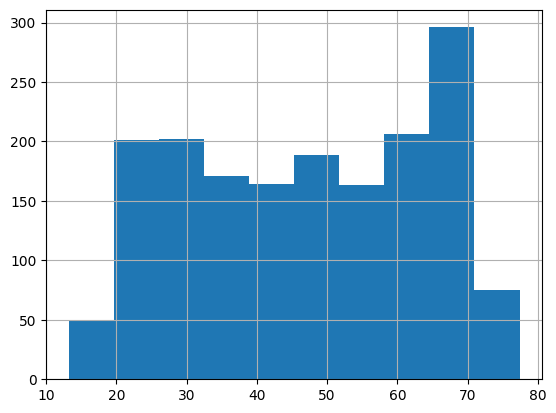

In [87]:
hist = df['MLY-TAVG-NORMAL'].hist()

El valor mas repetido es 295 pero vemos que la media ronda los 200 asi que introducimos ese valor en todas las ocurrencias NaN
Aunque al ser variable continua, podemos imputar la media en los valores nulos con `df.fillna(df.mean())`


In [88]:
#df['MLY-TAVG-NORMAL'].fillna('200', inplace=True)
# Calcula la media de la columna 'MLY-TAVG-NORMAL', excluyendo los valores nulos
media = df['MLY-TAVG-NORMAL'].mean()

# Imprime la media
print("La media de la columna 'MLY-TAVG-NORMAL' es:", media)

df['MLY-TAVG-NORMAL'].fillna(df['MLY-TAVG-NORMAL'].mean(), inplace=True)

La media de la columna 'MLY-TAVG-NORMAL' es: 47.05157342657343


In [90]:
df.isnull().sum()

NAME                 0
DATE                 0
MLY-TAVG-NORMAL      0
MLY-TAVG-STDDEV    804
MLY-TMAX-NORMAL    528
MLY-TMAX-STDDEV    804
MLY-TMIN-NORMAL    528
MLY-TMIN-STDDEV    804
dtype: int64

## 02.Reformateo de datos

In [91]:
df

,NAME,DATE,MLY-TAVG-NORMAL,MLY-TAVG-STDDEV,MLY-TMAX-NORMAL,MLY-TMAX-STDDEV,MLY-TMIN-NORMAL,MLY-TMIN-STDDEV
STATION,,,,,,,,
USC00301492,"CINCINNATUS, NY US",1,47.051573,NaN,NaN,NaN,NaN,NaN
USC00301492,"CINCINNATUS, NY US",2,47.051573,NaN,NaN,NaN,NaN,NaN
USC00301492,"CINCINNATUS, NY US",3,47.051573,NaN,NaN,NaN,NaN,NaN
USC00301492,"CINCINNATUS, NY US",4,47.051573,NaN,NaN,NaN,NaN,NaN
USC00301492,"CINCINNATUS, NY US",5,47.051573,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
USW00094725,"MASSENA INTERNATIONAL AIRPORT, NY US",8,66.600000,2.0,77.7,2.3,55.5,2.0
USW00094725,"MASSENA INTERNATIONAL AIRPORT, NY US",9,58.400000,2.3,69.4,2.8,47.3,2.4
USW00094725,"MASSENA INTERNATIONAL AIRPORT, NY US",10,46.300000,2.5,56.2,2.9,36.4,2.6


Por ejemplo, vamos a cambiar el formato de las fechas, todo un clasico

In [92]:
columna_fecha = pd.to_datetime(df['DATE'], format='%m')
columna_fecha


STATION
USC00301492   1900-01-01
USC00301492   1900-02-01
USC00301492   1900-03-01
USC00301492   1900-04-01
USC00301492   1900-05-01
                 ...    
USW00094725   1900-08-01
USW00094725   1900-09-01
USW00094725   1900-10-01
USW00094725   1900-11-01
USW00094725   1900-12-01
Name: DATE, Length: 2244, dtype: datetime64[ns]

In [93]:
# Establece el año como 2024 y el día como 1 para cada fecha
df['DATE'] = pd.to_datetime(df['DATE'], format='%m')
df['DATE'] = df['DATE'].apply(lambda x: x.replace(year=2024, day=1))
df.head()

,NAME,DATE,MLY-TAVG-NORMAL,MLY-TAVG-STDDEV,MLY-TMAX-NORMAL,MLY-TMAX-STDDEV,MLY-TMIN-NORMAL,MLY-TMIN-STDDEV
STATION,,,,,,,,
USC00301492,"CINCINNATUS, NY US",2024-01-01,47.051573,NaN,NaN,NaN,NaN,NaN
USC00301492,"CINCINNATUS, NY US",2024-02-01,47.051573,NaN,NaN,NaN,NaN,NaN
USC00301492,"CINCINNATUS, NY US",2024-03-01,47.051573,NaN,NaN,NaN,NaN,NaN
USC00301492,"CINCINNATUS, NY US",2024-04-01,47.051573,NaN,NaN,NaN,NaN,NaN
USC00301492,"CINCINNATUS, NY US",2024-05-01,47.051573,NaN,NaN,NaN,NaN,NaN


Utilizamos la funcion `dt.strftime` para definir una nueva mascara de fechas

In [94]:
cambio_fecha_df = columna_fecha.dt.strftime("%m/%d/%y")

In [95]:
cambio_fecha_df

STATION
USC00301492    01/01/00
USC00301492    02/01/00
USC00301492    03/01/00
USC00301492    04/01/00
USC00301492    05/01/00
                 ...   
USW00094725    08/01/00
USW00094725    09/01/00
USW00094725    10/01/00
USW00094725    11/01/00
USW00094725    12/01/00
Name: DATE, Length: 2244, dtype: object

Otro clasico es cambiar los , por , o viceversa como separador de cifras

In [96]:
columna_tavg_normal = df['MLY-TAVG-NORMAL'].astype(str).str.replace('.', ',')

In [97]:
columna_tavg_normal

STATION
USC00301492    47,05157342657343
USC00301492    47,05157342657343
USC00301492    47,05157342657343
USC00301492    47,05157342657343
USC00301492    47,05157342657343
                     ...        
USW00094725                 66,6
USW00094725                 58,4
USW00094725                 46,3
USW00094725                 35,4
USW00094725                 22,1
Name: MLY-TAVG-NORMAL, Length: 2244, dtype: object

## 03.Normalizacion, centrado y escalado

In [98]:
df

,NAME,DATE,MLY-TAVG-NORMAL,MLY-TAVG-STDDEV,MLY-TMAX-NORMAL,MLY-TMAX-STDDEV,MLY-TMIN-NORMAL,MLY-TMIN-STDDEV
STATION,,,,,,,,
USC00301492,"CINCINNATUS, NY US",2024-01-01,47.051573,NaN,NaN,NaN,NaN,NaN
USC00301492,"CINCINNATUS, NY US",2024-02-01,47.051573,NaN,NaN,NaN,NaN,NaN
USC00301492,"CINCINNATUS, NY US",2024-03-01,47.051573,NaN,NaN,NaN,NaN,NaN
USC00301492,"CINCINNATUS, NY US",2024-04-01,47.051573,NaN,NaN,NaN,NaN,NaN
USC00301492,"CINCINNATUS, NY US",2024-05-01,47.051573,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
USW00094725,"MASSENA INTERNATIONAL AIRPORT, NY US",2024-08-01,66.600000,2.0,77.7,2.3,55.5,2.0
USW00094725,"MASSENA INTERNATIONAL AIRPORT, NY US",2024-09-01,58.400000,2.3,69.4,2.8,47.3,2.4
USW00094725,"MASSENA INTERNATIONAL AIRPORT, NY US",2024-10-01,46.300000,2.5,56.2,2.9,36.4,2.6


Vamos a trabajar con las columnas MLY-TAVG-NORMAL aqui vamos a utilizar una funcion de sklearn para hacer este preprocesado. Hay muchas formas de escalar y estandarizar valores, en este caso vamos a utilizar una tecnica para dejar los valores entre -1 y 1. El framework sklearn tiene una buena [paleta de funciones](https://https://scikit-learn.org/stable/modules/preprocessing.html) para realizar preparacion de datos. Lo dejaremos en una nueva columna. MLY-TAVG-NORMALICE

Para escalar correctamente una columna con temperaturas, puedes utilizar diferentes técnicas de escalado según tus necesidades y el rango de valores de tus datos. Aquí te presento dos enfoques comunes: Min-Max Scaling y Z-score Scaling (también conocido como Standardization).

Min-Max Scaling:
Esta técnica escala los datos al rango específico [0, 1], lo que significa que el valor mínimo se transforma en 0 y el valor máximo se transforma en 1. El resto de los valores se escalan linealmente en el intervalo. Puedes hacerlo utilizando MinMaxScaler de scikit-learn.

Z-score Scaling (Standardization):
Esta técnica transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Esto significa que los datos estarán centrados alrededor de cero y tendrán una varianza unitaria. Puedes lograrlo restando la media y dividiendo por la desviación estándar de los datos.

In [100]:
from sklearn import preprocessing

columna_temperatura = df['MLY-TAVG-NORMAL'].values #Devuelve numpy
min_max_scaler = preprocessing.MinMaxScaler()
columna_temperatura_scaled = min_max_scaler.fit_transform(columna_temperatura.reshape(-1, 1))
# Crea una nueva columna 'MLY-TAVG-NORMAL-SCALED' en el DataFrame y asigna los valores escalados
df['MLY-TAVG-NORMAL-SCALED'] = columna_temperatura_scaled
df.head()

,NAME,DATE,MLY-TAVG-NORMAL,MLY-TAVG-STDDEV,MLY-TMAX-NORMAL,MLY-TMAX-STDDEV,MLY-TMIN-NORMAL,MLY-TMIN-STDDEV,MLY-TAVG-NORMAL-SCALED
STATION,,,,,,,,,
USC00301492,"CINCINNATUS, NY US",2024-01-01,47.051573,NaN,NaN,NaN,NaN,NaN,0.527283
USC00301492,"CINCINNATUS, NY US",2024-02-01,47.051573,NaN,NaN,NaN,NaN,NaN,0.527283
USC00301492,"CINCINNATUS, NY US",2024-03-01,47.051573,NaN,NaN,NaN,NaN,NaN,0.527283
USC00301492,"CINCINNATUS, NY US",2024-04-01,47.051573,NaN,NaN,NaN,NaN,NaN,0.527283
USC00301492,"CINCINNATUS, NY US",2024-05-01,47.051573,NaN,NaN,NaN,NaN,NaN,0.527283


In [101]:
# Z-score Scaling (Standardization)
mean_temp = df['MLY-TAVG-NORMAL'].mean()
std_temp = df['MLY-TAVG-NORMAL'].std()
df['MLY-TAVG-NORMAL_STANDARDIZED'] = (df['MLY-TAVG-NORMAL'] - mean_temp) / std_temp

# Muestra las primeras filas del DataFrame con las nuevas columnas escaladas
print(df.head())

                           NAME       DATE  MLY-TAVG-NORMAL  MLY-TAVG-STDDEV  \
STATION                                                                        
USC00301492  CINCINNATUS, NY US 2024-01-01        47.051573              NaN   
USC00301492  CINCINNATUS, NY US 2024-02-01        47.051573              NaN   
USC00301492  CINCINNATUS, NY US 2024-03-01        47.051573              NaN   
USC00301492  CINCINNATUS, NY US 2024-04-01        47.051573              NaN   
USC00301492  CINCINNATUS, NY US 2024-05-01        47.051573              NaN   

             MLY-TMAX-NORMAL  MLY-TMAX-STDDEV  MLY-TMIN-NORMAL  \
STATION                                                          
USC00301492              NaN              NaN              NaN   
USC00301492              NaN              NaN              NaN   
USC00301492              NaN              NaN              NaN   
USC00301492              NaN              NaN              NaN   
USC00301492              NaN              N

## 04.Integracion de datos

Vamos a genera un dataframe dummy para realizar un JOIN entre ellos, por ejemplo vamos a imaginar que tenemos datos con informacion (columnas A,B,C,D con datos aleatorios) de los vientos en km

In [102]:
df_dummy = pd.DataFrame(np.random.randint(0,1000,size=(100, 4)), columns=list('ABCD'))

In [103]:
df_dummy['MLY-TAVG-NORMAL'] = df['MLY-TAVG-NORMAL'].sample(n=100).tolist()

In [104]:
df_dummy

,A,B,C,D,MLY-TAVG-NORMAL
0,50,447,360,992,47.051573
1,192,217,224,349,42.900000
2,176,208,198,562,55.300000
3,111,515,625,85,51.300000
4,667,995,6,937,30.200000
...,...,...,...,...,...
95,514,557,757,288,68.000000
96,125,697,765,99,47.051573
97,170,325,476,791,67.900000
98,432,359,632,747,43.800000


Por ultimo, podemos realizar JOINs al estilo SQL con la funcion merge de pandas, en este caso vamos a realizar por ejemplo un INNER JOIN entre los dataframes df y df_dummy

In [105]:
df_joined = pd.merge(df, df_dummy, on='MLY-TAVG-NORMAL', how='inner')

In [106]:
df_joined

,NAME,DATE,MLY-TAVG-NORMAL,MLY-TAVG-STDDEV,MLY-TMAX-NORMAL,MLY-TMAX-STDDEV,MLY-TMIN-NORMAL,MLY-TMIN-STDDEV,MLY-TAVG-NORMAL-SCALED,MLY-TAVG-NORMAL_STANDARDIZED,A,B,C,D
0,"CINCINNATUS, NY US",2024-01-01,47.051573,NaN,NaN,NaN,NaN,NaN,0.527283,-4.829791e-16,50,447,360,992
1,"CINCINNATUS, NY US",2024-01-01,47.051573,NaN,NaN,NaN,NaN,NaN,0.527283,-4.829791e-16,299,900,249,659
2,"CINCINNATUS, NY US",2024-01-01,47.051573,NaN,NaN,NaN,NaN,NaN,0.527283,-4.829791e-16,273,323,929,140
3,"CINCINNATUS, NY US",2024-01-01,47.051573,NaN,NaN,NaN,NaN,NaN,0.527283,-4.829791e-16,251,840,521,635
4,"CINCINNATUS, NY US",2024-01-01,47.051573,NaN,NaN,NaN,NaN,NaN,0.527283,-4.829791e-16,10,593,170,416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12506,"MALONE, NY US",2024-06-01,63.200000,2.3,72.7,2.6,53.7,2.3,0.778816,1.097661e+00,919,25,245,850
12507,"CHERRY VALLEY 2 NNE, NY US",2024-03-01,31.400000,3.1,40.6,3.5,22.2,3.1,0.283489,-1.063888e+00,788,852,137,545
12508,"GLENS FALLS FARM, NY US",2024-03-01,31.400000,3.2,44.6,3.3,18.2,3.5,0.283489,-1.063888e+00,788,852,137,545
12509,"PERU 2 WSW, NY US",2024-03-01,31.400000,3.4,41.2,3.4,21.5,3.7,0.283489,-1.063888e+00,788,852,137,545


## 05.Discretizacion y 1-hot-encoding

Por ultimo, dos tecnicas muy usadas en la preparacion de features para nuestros modelos de ML son la discretizacion y el 1 hot encoding.
El 1 hot encoding intenta paliar el posible efecto adverso de convertir valores no numericos en una interpretaciion numerica: el 1 esta numericamente "mas cerca" del 2 que el 3.
Podemos utilizar la funcion get_dummiers de pandas

In [108]:
df

,NAME,DATE,MLY-TAVG-NORMAL,MLY-TAVG-STDDEV,MLY-TMAX-NORMAL,MLY-TMAX-STDDEV,MLY-TMIN-NORMAL,MLY-TMIN-STDDEV,MLY-TAVG-NORMAL-SCALED,MLY-TAVG-NORMAL_STANDARDIZED
STATION,,,,,,,,,,
USC00301492,"CINCINNATUS, NY US",2024-01-01,47.051573,NaN,NaN,NaN,NaN,NaN,0.527283,-4.829791e-16
USC00301492,"CINCINNATUS, NY US",2024-02-01,47.051573,NaN,NaN,NaN,NaN,NaN,0.527283,-4.829791e-16
USC00301492,"CINCINNATUS, NY US",2024-03-01,47.051573,NaN,NaN,NaN,NaN,NaN,0.527283,-4.829791e-16
USC00301492,"CINCINNATUS, NY US",2024-04-01,47.051573,NaN,NaN,NaN,NaN,NaN,0.527283,-4.829791e-16
USC00301492,"CINCINNATUS, NY US",2024-05-01,47.051573,NaN,NaN,NaN,NaN,NaN,0.527283,-4.829791e-16
...,...,...,...,...,...,...,...,...,...,...
USW00094725,"MASSENA INTERNATIONAL AIRPORT, NY US",2024-08-01,66.600000,2.0,77.7,2.3,55.5,2.0,0.831776,1.328770e+00
USW00094725,"MASSENA INTERNATIONAL AIRPORT, NY US",2024-09-01,58.400000,2.3,69.4,2.8,47.3,2.4,0.704050,7.713895e-01
USW00094725,"MASSENA INTERNATIONAL AIRPORT, NY US",2024-10-01,46.300000,2.5,56.2,2.9,36.4,2.6,0.515576,-5.108690e-02


In [113]:
y = pd.get_dummies(df['NAME'], prefix='1HotEnc')

In [114]:
y

,"1HotEnc_ADDISON, NY US","1HotEnc_ALBANY INTERNATIONAL AIRPORT, NY US","1HotEnc_ALBION 2 NE, NY US","1HotEnc_ALCOVE DAM, NY US","1HotEnc_ALFRED, NY US","1HotEnc_ALLEGANY STATE PARK, NY US","1HotEnc_ANGELICA, NY US","1HotEnc_ARKVILLE 2 W, NY US","1HotEnc_AUBURN, NY US","1HotEnc_AURORA RESEARCH FARM, NY US",...,"1HotEnc_WEST POINT, NY US","1HotEnc_WEST SAND LAKE 2 S, NY US","1HotEnc_WESTCHESTER CO AIRPORT, NY US","1HotEnc_WESTHAMPTON GABRESKI AIRPORT, NY US","1HotEnc_WHITEHALL, NY US","1HotEnc_WHITESVILLE, NY US","1HotEnc_WHITNEY POINT DAM, NY US","1HotEnc_WILLSBORO 1 N, NY US","1HotEnc_YORKTOWN HEIGHTS 1 W, NY US","1HotEnc_YOUNGSTOWN 2 NE, NY US"
STATION,,,,,,,,,,,,,,,,,,,,,
USC00301492,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
USC00301492,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
USC00301492,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
USC00301492,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
USC00301492,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USW00094725,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
USW00094725,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
USW00094725,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Para generar una cuantizacion vamos primero a generar una columna dummy con una variable continua

In [115]:
df_dist = pd.DataFrame(np.random.randint(0,3456,size=(100, 1)), columns=list('A'))

In [116]:
df_dist

,A
0,367
1,3297
2,2129
3,705
4,939
...,...
95,752
96,2064
97,3180
98,156


Y ahora podemos utilizar la funcion ´qcut´ de pandas para discretizar estos valores por ejemplo en 3 buckets

In [117]:
pd.qcut(df_dist.A, 3, labels=["Alto","Medio","Bajo"])

0      Alto
1      Bajo
2     Medio
3      Alto
4     Medio
      ...  
95     Alto
96    Medio
97     Bajo
98     Alto
99    Medio
Name: A, Length: 100, dtype: category
Categories (3, object): ['Alto' < 'Medio' < 'Bajo']